# ENPH 213 - Week 7 Lab

In this lab, we will be working on Discrete Fourier Transforms and continuing to develop your Python skills.

When you are finished, please rename this notebook to LastName_ENPH213_Lab7, where LastName is your last name.  Submit that file to onQ.

For marking Parts 1-4 will be marked together (Weighted out of 10).

In [1]:
import numpy as np
import cmath as cm
import math as m
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
## code from Lab 4 to implement BackSub
# this makes it easier to run one file instead of importing the function which had caused problems

def GaussPivot(Ab , col):
    #goal is to simulate the rows that need to be pivoted
    if ((np.max(Ab[col:,col])) > (Ab[col,col])): # test codition for swapping rows
       
        Ab[[col,np.argmax(Ab[col:,col]) + col],:] = Ab[[np.argmax(Ab[col:,col]) + col,col], :] #swapping rows
        
    return Ab

def GaussElim(Ab,col):
    #call the pivot func
    Ab1 = GaussPivot(Ab, col)
    Nrows = Ab.shape[0]  # set the bounds of the loop to the rows in the array
    
    # loop through the array and use the eqn given
    # row i = row i - Aij/Ajj * row j
    for i in range(col+1, Nrows):
       
        Ab1[i][:] = Ab1[i][:]-(Ab1[i][col]/(np.copy(Ab1[col][col])))*Ab1[col][:]
    
    return Ab1

def UpTriang(A, b):
    
    column = A.shape[0] # number of col
    
    Ab = np.concatenate([np.array(A),np.transpose(np.array(b))], 1) # making the new array with b on A
  
    copy = np.copy(Ab) # copying the array
    
    for i in range(column): # looping through the array
        copy = GaussElim(copy,i) # calling our elim func for increasing columns
        
    return copy

#Function from Lab 4
def BackSub(A,b):
    
    upperA = UpTriang(A,b) # call the Uptriangle Func
    
    for i in range(A.shape[0]): # loop through for num columns
        
        upperA[i,:] = upperA[i,:]/upperA[i,i]
        
    copy = np.copy(upperA) # make a copy of array
    
    # nest for loops to iterate throught the array
    for a in range(upperA.shape[0]-1,-1,-1):
        
        for b in range(a-1,-1,-1):
            
            copy[b,:] = copy[b,:]-upperA[a,:]*upperA[b,a] # subtract and set new value
            
            upperA = np.copy(copy)
            
            newArray = upperA[:,A.shape[0]] 
    return newArray

## Part 1

Create two windowing functions.

The first is a Trapezoidal Window function $trapWindow(x)$ that rises in the first 10% and falls in the final 10% of the points.  It should be at its maximum value for all points in between.

The second function is $sineWindow(x)$ that uses the first lobe of a sine wave (from 0 to $\pi$).

Both of these window functions should accomodate an input data set with an arbitrary, even number of points.  

Plot the functions for 50 points within the range of $-1 \leq x \leq 1$.


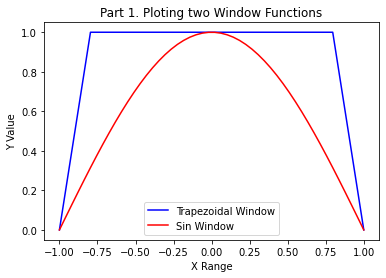

In [3]:
maxY = 1 # creating an arbitray max y-value of 1

def t𝑟𝑎𝑝𝑊𝑖𝑛𝑑𝑜𝑤(𝑥):
    size = len(x)                      #  setting the length to the size of the x array
    tenth = m.floor(size*0.1)          # creating a value for 1/10 the size. Needs to be an int value so using the floor function
    trapArray = np.ones(size)*maxY     # creating an array of Max Y values for the size of x
    
    for i in range(tenth):             # iterating through the array and making the first and last tenth linear plots slope of index/tenth
        trapArray[i] = i/tenth
        trapArray[-i-1]= i/tenth
        
    return trapArray


def sineWindow(x):
    size = len(x)                     #  setting the length to the size of the x array
    sineArray = np.ones(size)*maxY    #  initalizing the sine array
    
    for i in range (size):
        sineArray[i] = np.sin(i * np.pi/(size-1))     # calculating the sin window
        
    return sineArray

       
xPoints = np.linspace(-1, 1, 50) # 50 points within the range of  −1≤𝑥≤1 .

# plotting the functions
plt.plot(xPoints, trapWindow(xPoints), 'b', label = 'Trapezoidal Window')
plt.plot(xPoints, sineWindow(xPoints), 'r', label = 'Sin Window')

plt.title("Part 1. Ploting two Window Functions")
plt.xlabel("X Range")
plt.ylabel("Y Value")
plt.legend(loc='lower center')
plt.show()

# Part 2

Create a data set of the linear funcion $f(t) = 2t$ with 30 regularly spaced points between  $-\pi \leq t \leq \pi$.  Manually set the first and last points to zero as a basic windowing protocol.  This creates a sawtooth function.

Create a function $myDFT(t, y)$ that calculates and prints the $a_k$ and $b_k$ coefficients using the forms for discrete Fourier Transforms.  Once found, create a second function $plotFourier(t, ak, bk, omega)$ that returns the evaluated Fourier expansion and plots the Fourier series expansion using the Fourier coefficients as input.  Plot the function using 201 points in graph.

Remember that when you remove the last point, your data set will have an odd number of points. 

Coefficients Array
 ak
 [ 8.28966525e-16 -6.51330841e-16  8.28966525e-16 -3.55271368e-16
 -6.21724894e-16  2.66453526e-16 -1.39147952e-15  1.99470070e-15
 -1.02140518e-15  8.88178420e-16  1.21384384e-15 -2.13162821e-15
  2.96059473e-15 -2.54611147e-15  1.89478063e-15] 
bk
 [ 0.          3.85152899 -1.90298658  1.24318863 -0.90539217  0.69618235
 -0.55102593  0.44220521 -0.35579905  0.28400702 -0.2220756   0.16689666
 -0.11630119  0.06867173 -0.02271096]


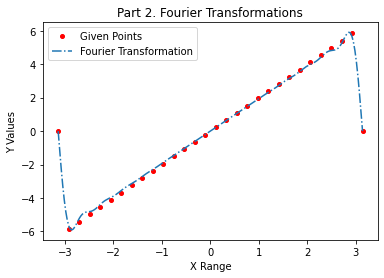

In [4]:
t = np.linspace(-np.pi, np.pi, 30)

# sawtooth function
def sawtooth(t):
    f = 2*t # linear funcion 
    f[0] = 0 # set first index to 0
    f[len(t)-1] = 0 # set last index to 0
    return f


# calculating coeff for discrete Fourier Transforms
def 𝑚𝑦𝐷𝐹𝑇(𝑡,𝑦):
    omega = (2*np.pi)/(t[-1] - t[0]) # calculate omega
    
    maxK = m.floor(len(y)/2) # max k value is at half the length
   
    a = np.zeros(maxK) #initalize the coeff arrays
    b = np.zeros(maxK)
    
    for i in range(maxK): # calculate the coeff ak and bk
        a[i] = 1/maxK*np.sum(y[0:-1] * np.cos(i*omega*t[0:-1]))
        
        b[i] = 1/maxK*np.inner(y[0:-1], np.sin(i*omega*t[0:-1]))
        
    print("Coefficients Array\n ak\n", a,"\nbk\n",b) # test print for coeff arrays
    return omega, a, b


def plotFourier (t, ak, bk, omega):
    
    for i in range(ak.size): # calculate fourier skip the first term
        if (i ==0):
            fourier = np.ones(t.size) * ak[0]/2 # first term of fourier
            
        fourier += ak[i]*np.cos(i*omega*t)+bk[i]*np.sin(i*omega*t)
        
    plt.plot(tF, fourier, '-.')
    plt.xlabel("X Range")
    plt.ylabel("Y Values")

    return fourier


# the Given Points
f = sawtooth(t) # calling the sawtooth function for −𝜋 ≤ 𝑡 ≤ 𝜋 .
omega, ak, bk = myDFT(t, f) # calc the coeff
plt.plot(t, f, 'ro',markersize = 4)


# fourier plot 
tF = np.linspace(-np.pi, np.pi, 201)
fF = plotFourier(tF, ak, bk, omega)

#adding titles and headings
plt.title("Part 2. Fourier Transformations")
plt.legend(("Given Points",'Fourier Transformation'))
plt.show()

# Part 3

Use the two windowing functions from Part 1 (separately) on the sawtooth function from Part 2.  Determine and print the coefficients and plot the figures.



** Trapeziodal 
Coefficients Array
 ak
 [ 3.84877315e-16 -6.51330841e-16  8.73375446e-16 -4.14483263e-16
 -5.92118946e-16  3.03460960e-16 -1.42108547e-15  2.05668815e-15
 -1.03990890e-15  8.43769499e-16  1.15463195e-15 -2.11682523e-15
  2.91618581e-15 -2.53130850e-15  1.90958360e-15] 
bk
 [ 0.          3.63866496 -1.50117025  0.69654518 -0.27151348  0.03751314
  0.07412016 -0.10304798  0.08047158 -0.03349611 -0.01532474  0.04968337
 -0.06091183  0.0483255  -0.01824132]

** Sinusoidal 
Coefficients Array
 ak
 [ 3.99680289e-16 -3.10862447e-16  2.66453526e-16 -2.88657986e-16
 -2.18343862e-16 -3.14563190e-16 -5.07001848e-16  8.21102445e-16
 -2.13717932e-16  5.66213743e-16  3.77475828e-16 -6.32827124e-16
  7.17944223e-16 -5.03301104e-16  1.17683641e-15] 
bk
 [ 0.00000000e+00  2.18807438e+00 -1.75023896e-01  4.81920974e-02
 -1.97985277e-02  9.98413522e-03 -5.70026004e-03  3.52964051e-03
 -2.30678965e-03  1.55891696e-03 -1.06867971e-03  7.25933940e-04
 -4.69987371e-04  2.64495737e-04 -8.54223

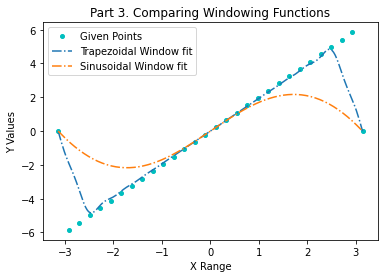

In [5]:
plt.plot(t, f, 'co',markersize = 4, label = 'Given Points') # ploting the given points

yTrap = f * trapWindow(t) # calling the trapeziod window func
print("** Trapeziodal ")
omega, akTrap, bkTrap = myDFT(t, yTrap) # calculating the trap coeff
# plot the trap fourier plot
yFTrap = plotFourier(tF, akTrap, bkTrap, omega) # fourier plot of trapeziod func

ySine = f * sineWindow(t) # calling the sine function
print('\n** Sinusoidal ')
omega, akSine, bkSine = myDFT(t, ySine) # calculating the sin coeff

# plot the sin fourier plot
yFSine = plotFourier(tF, akSine, bkSine, omega)   

plt.title("Part 3. Comparing Windowing Functions")
plt.legend(("Given Points",'Trapezoidal Window fit','Sinusoidal Window fit'))
plt.show()

**Question: Which windowing function seems to work best?**

The Trapezodial fit seems to be more accurate for most of the points since the given plot has a linear nature. 

# Part 4

Create a function $cDFT(t, y)$ that calculates and prints the $c_k$ coefficients using the complex form for discrete Fourier transforms. Be sure to comment on the format of the output array.  Once found, plot the absolute value of the coefficients against the "frequencies" $k \omega$ of the Fourier transform.  Note, there are no negative frequencies, but it is sometimes useful to plot them for visual analysis.

Coefficients Array
 ck
 [ 1.22124533e-15-0.02271096j  1.88737914e-15-0.02271096j
 -2.49800181e-15+0.06867173j  3.10862447e-15-0.11630119j
 -2.05391260e-15+0.16689666j  1.27675648e-15-0.2220756j
  8.88178420e-16+0.28400702j -1.02695630e-15-0.35579905j
  2.11636264e-15+0.44220521j -1.29063427e-15-0.55102593j
  3.88578059e-16+0.69618235j -6.10622664e-16-0.90539217j
 -4.44089210e-16+1.24318863j  1.11022302e-15-1.90298658j
 -3.33066907e-16+3.85152899j  9.43689571e-16+0.j
 -3.33066907e-16-3.85152899j  1.11022302e-15+1.90298658j
 -4.44089210e-16-1.24318863j -6.10622664e-16+0.90539217j
  3.88578059e-16-0.69618235j -1.29063427e-15+0.55102593j
  2.11636264e-15-0.44220521j -1.02695630e-15+0.35579905j
  8.88178420e-16-0.28400702j  1.27675648e-15+0.2220756j
 -2.05391260e-15-0.16689666j  3.10862447e-15+0.11630119j
 -2.49800181e-15-0.06867173j  1.88737914e-15+0.02271096j]


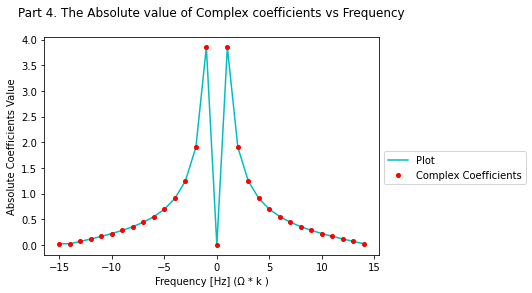

In [6]:
# dont use backsub
# do the sam ething for a and b
#instead of cosine or sine its the e^pow 
#also generate the first set of data

def cDFT(t, y):
    omega = 2 * np.pi/(t[-1] - t[0]) # find omega
    maxK = m.floor(len(y)/2) # max of the plot at half the range
    
    ck = np.zeros(len(y), dtype = 'complex') # initalize the complex array

    for i in range(len(y)):       # solving for the complex coeff
        for j in range(len(y)-1):
            ck[i]+= 1/maxK*(y[j]*cm.exp(-omega*(i-maxK)*1j*t[j]))
            
    print("Coefficients Array\n ck\n", ck) # test print for coeff arrays
    return omega, ck

t = np.linspace(-np.pi, np.pi, 30) #points to determine ck
f = sawtooth(t)
omega, ck = cDFT(t, f) # determine the complex coeff

freq = np.zeros(len(ck)) # freq array

for k in range(len(ck)):
    freq[k] = omega * k -len(t)/2 
    #calculating the freq points

#Complex coeff plot
plt.plot(freq, abs(ck), 'c-', label = "Plot")
plt.plot(freq, abs(ck), 'ro',markersize = 4, label = 'Complex Coefficients')

plt.title("Part 4. The Absolute value of Complex coefficients vs Frequency\n")
plt.ylabel('Absolute Coefficients Value')
plt.xlabel('Frequency [Hz] (\u03A9 * k )')
plt.legend(bbox_to_anchor=(1.0, 0.5))
plt.show()

/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


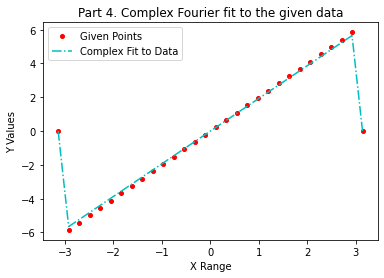

In [32]:
# Testing the coeffecients by making a fourier fit to the data using them
def plotComp(t,ck,y):
    omega = 2 * np.pi/(t[-1] - t[0]) # find omega
    maxK = m.floor(len(y)/2) # max of the plot at half the range
    p = np.zeros(len(t), dtype = 'complex') # initalizing the complex y values array
    
    for i in range(len(t)-1):
        for a in range(maxK):
            p[i] += (ck[a]*cm.exp(a*omega*t[i]*1j)) # calculate p
            
    plt.plot(t, p,'c-.', label = "Complex Fit to Data") # plot the data
    plt.xlabel("X Range")
    plt.ylabel("Y Values")
    
    return p

plt.plot(t, f, 'ro',markersize = 4, label = 'Given Points') # ploting the given points

f = sawtooth(t) # calling the sawtooth function for −𝜋 ≤ 𝑡 ≤ 𝜋 .
halfCK = m.floor(len(ck)/2) # max of the plot at half the ck range

complexP = plotComp(t,(ck[halfCK:]),f) # calling the function for only half the ck array

plt.title("Part 4. Complex Fourier fit to the given data")
plt.legend()
plt.show()

## Acknowledgements

Please comment on any help that you received from your group members or others concerning this Lab assignment.

In [7]:
# All Code was written by Nathan Pacey.